# Re-center Particles

How to update particle location centers from alignments in 2D Classification data. 

Before proceeding, [install the `cryosparc-tools` module](intro) in your Python environment. Also ensure cryoSPARC base ports +2 and +3 (`39002` and `39003` in this example) are available on this machine.

The following python dependencies are also required to render results and may be installed with `conda` or `pip`:

* `pandas`
* `matplotlib`
* `numpy` (included with `cryosparc-tools`)

First initialize the `CryoSPARC` client:

In [1]:
from cryosparc.tools import CryoSPARC

cs = CryoSPARC(host="cryoem5", port=61000)
assert cs.test_connection()

Connection succeeded to cryoSPARC command_core at http://cryoem5:61002
Connection succeeded to cryoSPARC command_vis at http://cryoem5:61003


This instance has a 2D Classification and Select 2D Classes job at `P70-J4` and `P70-J5`, respectively. We want to re-extract those selected particles with updated centers computed by the 2D Classification job.

Retrieve the job handle and its particles output with the `load_output` method.

In [2]:
project = cs.find_project("P70")
job = cs.find_job("P70", "J20")
particles = job.load_output("particles_selected")

Get a subset of relevant columns and display the first 10 rows as a `pandas` dataframe:

In [18]:
import pandas as pd

first_10 = particles.slice(0, 10)
first_10 = first_10.filter_prefixes(["alignments2D", "location"])
pd.DataFrame(first_10.rows())

ctf/accel_kv  ctf/amp_contrast          ctf/anisomag  ctf/bfactor  \
0         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
1         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
2         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
3         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
4         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
5         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
6         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
7         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
8         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   
9         300.0               0.1  [0.0, 0.0, 0.0, 0.0]          0.0   

   ctf/cs_mm     ctf/df1_A     ctf/df2_A  ctf/df_angle_rad  ctf/exp_group_id  \
0        2.7  12320.516602  12207.985352          4.693367                 9   
1        2.7  12364.356445  12251.825195          4.693367                 9   
2        2.7  12401.706055  12289.174805          4.693367                 9   
3        2.7  12421.189453  12308.658203          4.693367                 9   
4        2.7  12324.324219  12211.792969          4.693367                 9   
5        2.7  12321.148438  12208.617188          4.693367                 9   
6        2.7  12313.666992  12201.135742          4.693367                 9   
7        2.7  12395.955078  12283.423828          4.693367                 9   
8        2.7  12666.545898  12554.014648          4.693367                 9   
9        2.7  12406.660156  12294.128906          4.693367                 9   

   ctf/phase_shift_rad  ctf/scale  ctf/scale_const ctf/shift_A  \
0                  0.0        1.0              1.0  [0.0, 0.0]   
1                  0.0        1.0              1.0  [0.0, 0.0]   
2                  0.0        1.0              1.0  [0.0, 0.0]   
3                  0.0        1.0              1.0  [0.0, 0.0]   
4                  0.0        1.0              1.0  [0.0, 0.0]   
5                  0.0        1.0              1.0  [0.0, 0.0]   
6                  0.0        1.0              1.0  [0.0, 0.0]   
7                  0.0        1.0              1.0  [0.0, 0.0]   
8                  0.0        1.0              1.0  [0.0, 0.0]   
9                  0.0        1.0              1.0  [0.0, 0.0]   

            ctf/tetra_A  ctf/tilt_A ctf/trefoil_A ctf/type  \
0  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
1  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
2  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
3  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
4  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
5  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
6  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
7  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
8  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   
9  [0.0, 0.0, 0.0, 0.0]  [0.0, 0.0]    [0.0, 0.0]   spline   

                    uid  
0  11618600011533810297  
1   3351310521090092994  
2  11740393318593419322  
3   3767435694474220742  
4   4944285645844730501  
5   8785214421103330726  
6  13562952944732328502  
7  12714908632771533690  
8  16241882173699318988  
9  11221058469975866061

Each particle has [`location/center_x_frac`, `location/center_y_frac`] fields which contain the fractional distance of each particle from the top-left corner of the micrograph. By convention, the top-left corner of the micrograph is `[0, 0]` and the bottom right corner is `[1, 1]`.

Use the shifts calculated by the 2D Classification job to modify the particle location. These are located at `alignments2D/shift` for each particle. These units are in pixels. Convert the original locations to pixels before doing the shift operation for increased floating point precision.

Be sure to update the `micrograph_psize` to the pixel size of the imported micrographs.

In [4]:
micrograph_psize = 0.6575  # import size of micrographs (may differ from particles if binned)
particle_psize = particles["alignments2D/psize_A"]

mic_shape_y, mic_shape_x = particles["location/micrograph_shape"].T
shift_x = particle_psize * particles["alignments2D/shift"][:, 0] / micrograph_psize
shift_y = particle_psize * particles["alignments2D/shift"][:, 1] / micrograph_psize
new_loc_x = particles["location/center_x_frac"] * mic_shape_x - shift_x
new_loc_y = particles["location/center_y_frac"] * mic_shape_y - shift_y

Create a copy of the particles dataset where the results are be saved. Convert the new locations back to fractions.

In [5]:
updated_particles = particles.copy()
updated_particles["location/center_x_frac"] = new_loc_x / mic_shape_x
updated_particles["location/center_y_frac"] = new_loc_y / mic_shape_y

Next, plot these particles onto a sample micrograph to check that the new locations were calculated correctly. First download the micrograph for one of the particles.

In [6]:
mic_path = particles["location/micrograph_path"][0]
header, mic = project.download_mrc(mic_path)

Use `matplotlib` to render the comparison plots. The following information is required for plotting:

* Downsampled and low-pass filtered micrograph with cryoSPARC's included utilities
* New downsampled width and height
* The min and maximum color range values, calculated as the 1st and 99th percentile pixel values to eliminate outliers
* The computed `(x, y)` pixel values at which to plot this micrograph's particles for the old and new locations


The old and new locations are rendered in yellow and cyan, respectively.

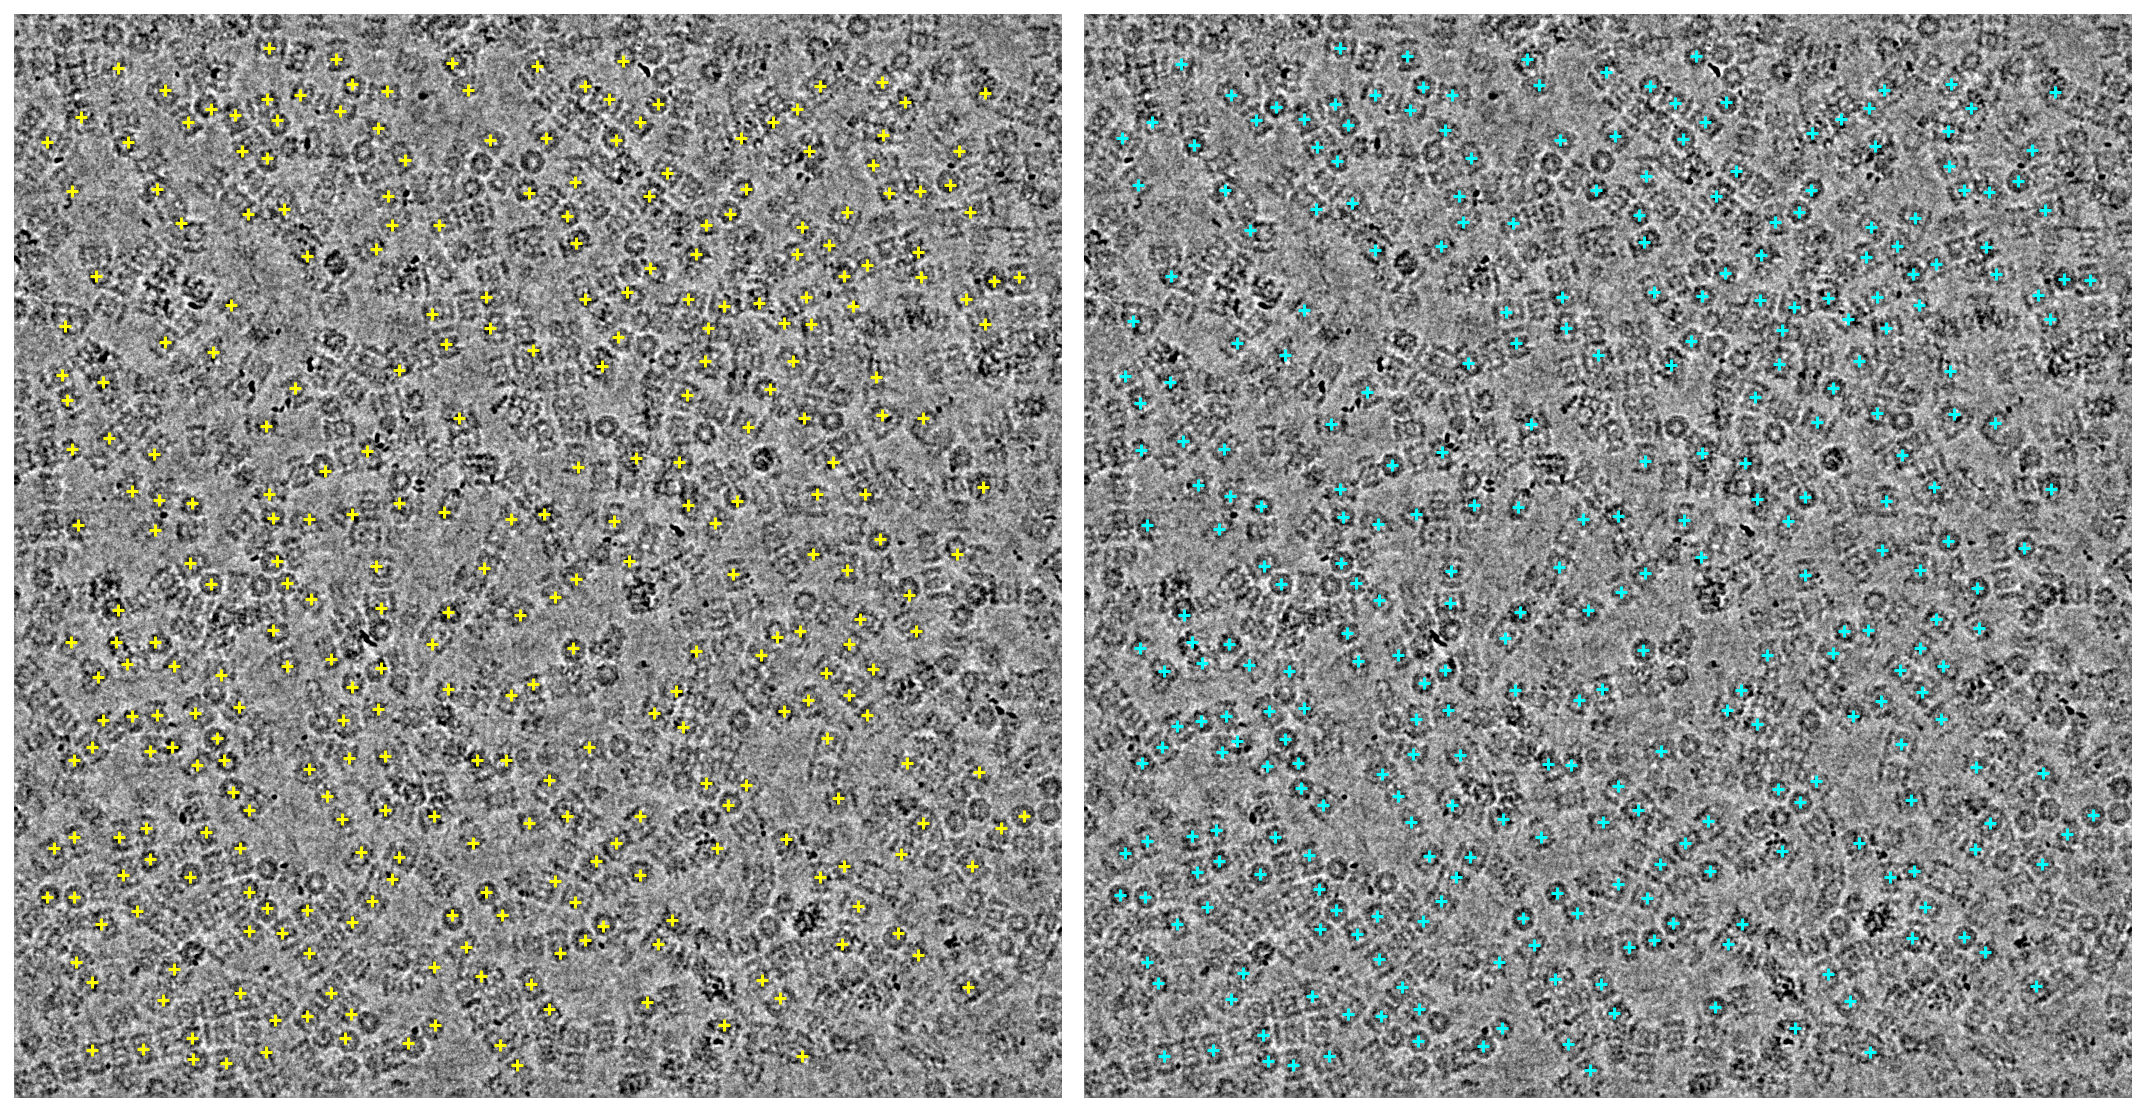

In [7]:
%matplotlib inline

from cryosparc.util import downsample, lowpass
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
import numpy as np

# Initialize a 2x1 plot with axis labels dsiabled
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8), dpi=144)
ax1.axis("off")
ax2.axis("off")

# Downsample and lowpass micrograph
binned = downsample(mic, factor=3)
lowpassed = lowpass(binned, psize_A=micrograph_psize, cutoff_resolution_A=20, order=0.7)
height, width = lowpassed.shape
vmin = np.percentile(lowpassed, 1)
vmax = np.percentile(lowpassed, 99)
ax1.imshow(lowpassed, cmap="gray", vmin=vmin, vmax=vmax, origin="lower")
ax2.imshow(lowpassed, cmap="gray", vmin=vmin, vmax=vmax, origin="lower")

# Plot old particles in magenta
mic_old_particles = particles.query({"location/micrograph_path": mic_path})
old_location_x = mic_old_particles["location/center_x_frac"] * width
old_location_y = mic_old_particles["location/center_y_frac"] * height
ax1.scatter(old_location_x, old_location_y, c="yellow", marker="+")

# Plot new particles in cyan
mic_new_particles = updated_particles.query({"location/micrograph_path": mic_path})
new_location_x = mic_new_particles["location/center_x_frac"] * width
new_location_y = mic_new_particles["location/center_y_frac"] * height
ax2.scatter(new_location_x, new_location_y, c="cyan", marker="+")

fig.tight_layout()

Those same locations overlaid on top of each other

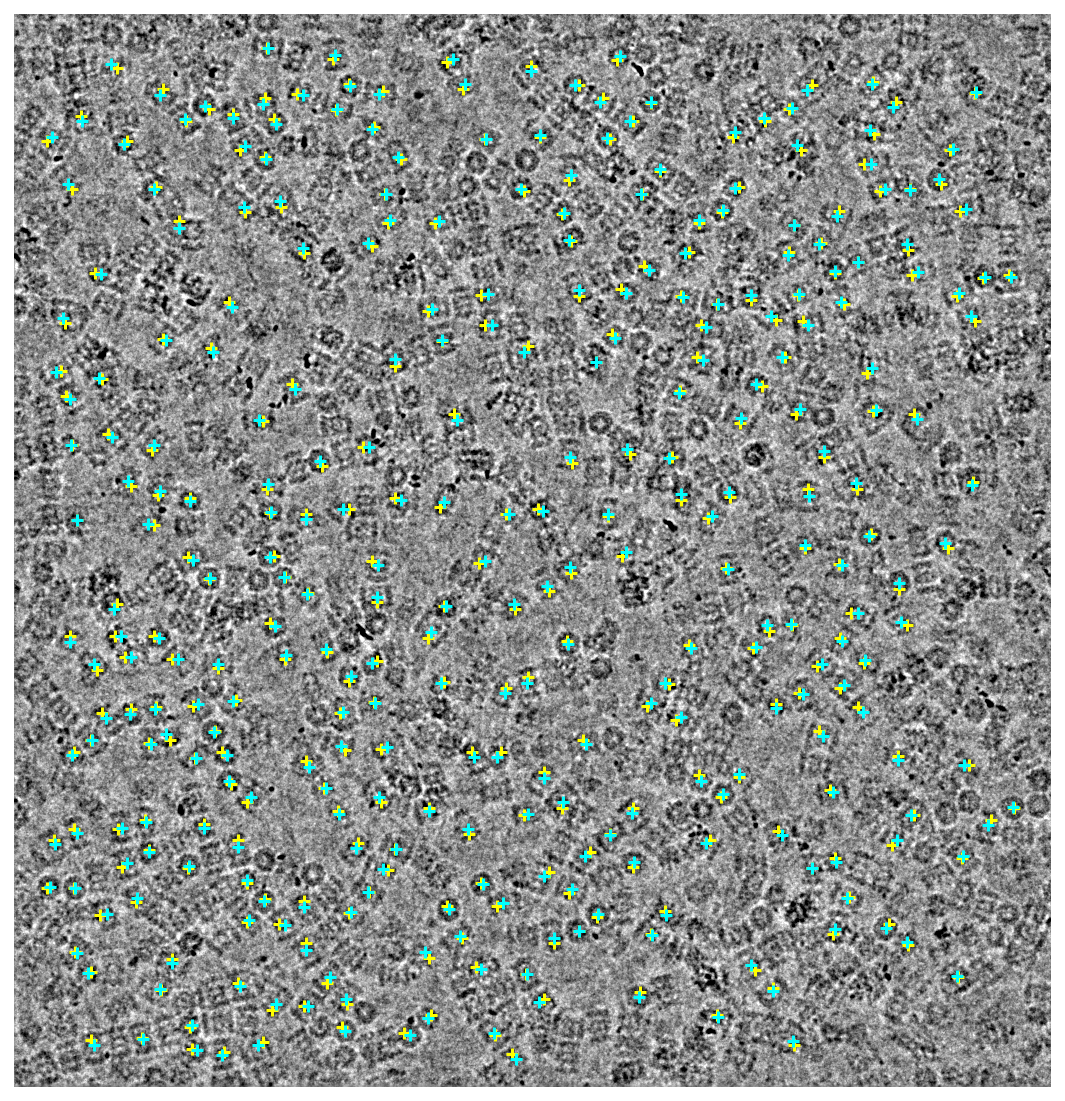

In [8]:
fig = plt.figure(figsize=(7.5, 8), dpi=144)
plt.axis("off")
plt.imshow(lowpassed, cmap="gray", vmin=vmin, vmax=vmax, origin="lower")
plt.scatter(old_location_x, old_location_y, c="yellow", marker="+")
plt.scatter(new_location_x, new_location_y, c="cyan", marker="+")

fig.tight_layout()

The last chore remaining before saving the results is to reset the `alignments2D` shifts to ensure they aren't used in downstream jobs.

In [9]:
updated_particles["alignments2D/shift"][:] = [0, 0]

Use the `project.save_external_result()` method with the specified arguments to save the results back to cryoSPARC for extraction and further analysis. The result will be a new "External job" in cryoSPARC in the same workspace as the original job.

Use the `slots` argument to indicate that only the `location/` and `alignments2D/` fields have changed.

Specify the `passthrough` argument as a tuple of the original Select 2D job UID and the output where the particles were loaded from. This ensures that the result is correctly placed in the job tree.

In [16]:
project.save_external_result(
    dataset=updated_particles,
    type="particle",
    name="recentered_particles",
    slots=["location", "alignments2D"],
    passthrough=(job.uid, "particles_selected"),
)

'J89'

Look for the "External" job with the number above in the cryoSPARC interface.